# 3. KNN

In [13]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# 2. Load the pre-split dataset

# Read the training and testing datasets from CSV files
X_train = pd.read_csv("../2_data/X_train_outlierremoved.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train_outlierremoved.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [15]:
# 3. Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# 4. Baseline performance of KNN with default values
# introduce the classifier with default values
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_baseline = KNeighborsClassifier()
knn_baseline.fit(X_train_scaled, y_train)

# Evaluate performance of classifier with default values
target_prediction = knn_baseline.predict(X_test_scaled)

base_accuracy = accuracy_score(y_test, target_prediction)
base_precision = precision_score(y_test, target_prediction, average='weighted')
base_recall = recall_score(y_test, target_prediction, average='weighted')
base_f1_weighted = f1_score(y_test, target_prediction, average='weighted')
base_auc_roc_score = roc_auc_score(y_test, target_prediction)

print("Baseline performance using k Nearest Neighbors")
print(f"Accuracy: {base_accuracy:.2f}")
print(f"Precision: {base_precision:.2f}")
print(f"Recall: {base_recall:.2f}")
print(f"F1-score: {base_f1_weighted:.2f}")
print(f"AUC ROC score: {base_auc_roc_score:.2f}")

# Uncomment the following lines to print the confusion matrix and classification report
# print(confusion_matrix(y_test, target_prediction))
# print(classification_report(y_test, target_prediction))


Baseline performance using k Nearest Neighbors
Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1-score: 0.84
AUC ROC score: 0.77


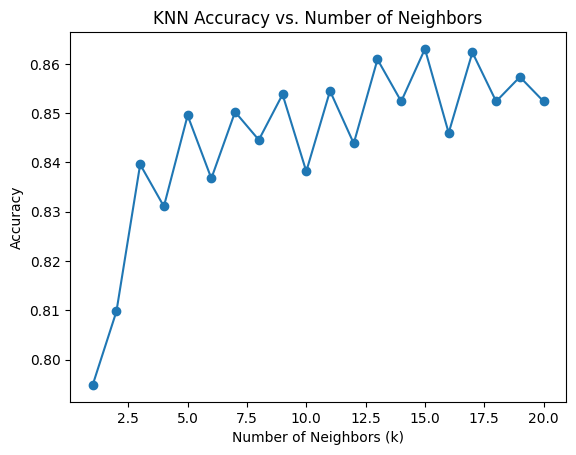

The best k value is: 15


In [17]:
import matplotlib.pyplot as plt

k_values = range(1, 21)  # Test k values from 1 to 20

def find_best_k(X_train_scaled, y_train, X_test_scaled, y_test, k_range):
    accuracies = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    best_k = k_range[accuracies.index(max(accuracies))]
    
    # Plot the accuracy for each k value
    plt.plot(k_range, accuracies, marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('KNN Accuracy vs. Number of Neighbors')
    plt.show()
    
    return best_k

best_k = find_best_k(X_train_scaled, y_train, X_test_scaled, y_test, k_values)
print(f"The best k value is: {best_k}")


In [18]:
# 4. Initialize and train the KNN model
# Set the number of neighbors (k)
k = best_k  # You can adjust this value to find the optimal k
print(k)
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier on the scaled training data
knn.fit(X_train_scaled, y_train)

15


KNeighborsClassifier(n_neighbors=15)

In [19]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and evaluate the model
accuracy_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
precision_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='precision')
recall_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='recall')
f1_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='f1')
roc_auc_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='roc_auc')

# Calculate the averages
average_scores = {
    'accuracy': accuracy_scores.mean(),
    'precision': precision_scores.mean(),
    'recall': recall_scores.mean(),
    'f1': f1_scores.mean(),
    'roc_auc': roc_auc_scores.mean()
}

# Convert the averages to a DataFrame
average_scores_df = pd.DataFrame([average_scores])

# Save the averages to a CSV file
average_scores_df.to_csv("../2_data/evaluation_metrics/KNN_cv_outlier.csv", index=False)

In [20]:
# Predict on the testing data
y_pred = knn.predict(X_test_scaled)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.86
Precision: 0.83
Recall: 0.61
F1: 0.70
ROC AUC: 0.78


In [22]:
evaluation_metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/KNN_prediction_outlier.csv", index=False)


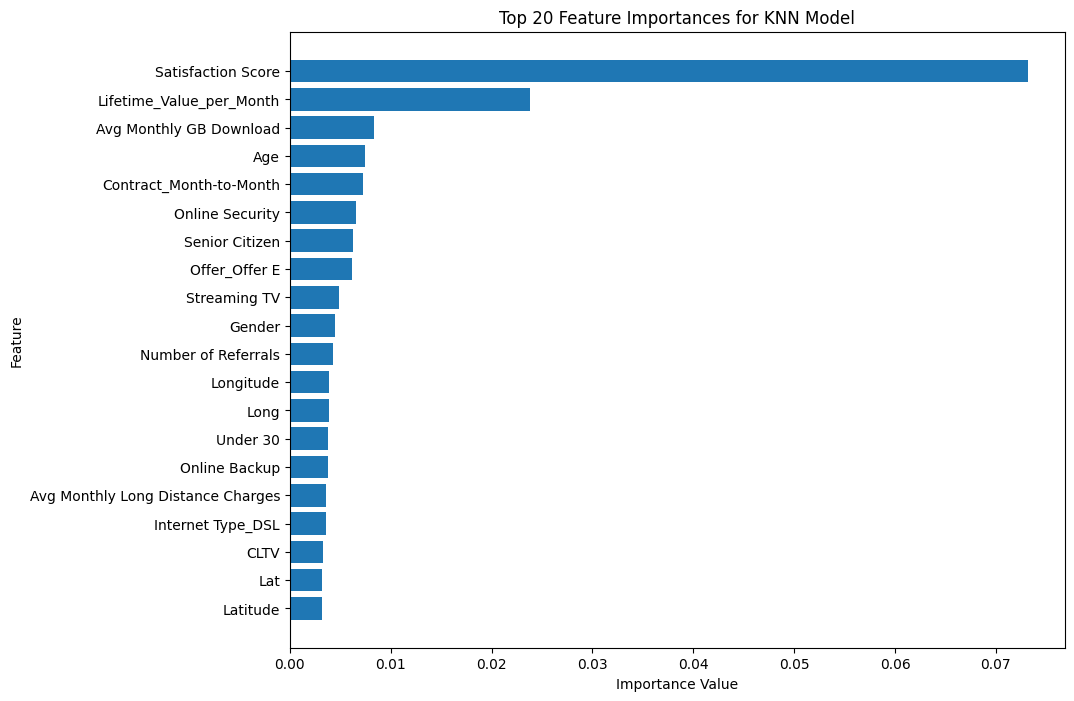

In [23]:
from sklearn.inspection import permutation_importance

# Extract feature names from the training data
feature_names = X_train.columns

# Calculate permutation importance
perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Get the feature importances and their corresponding feature names
knn_importances = perm_importance.importances_mean
knn_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': knn_importances})

# Sort the DataFrame by the importance values
knn_feature_importance_df = knn_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(knn_feature_importance_df['Feature'][:20], knn_feature_importance_df['Importance'][:20])
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances for KNN Model')
plt.gca().invert_yaxis()
plt.show()

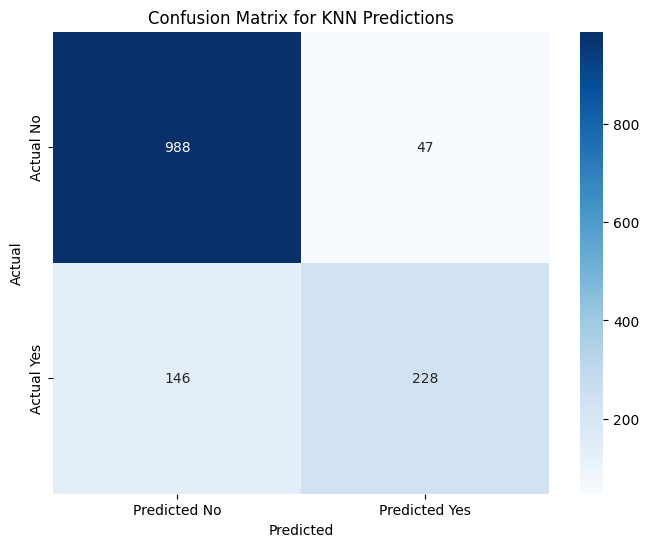

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Predictions')
plt.show()